In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [270]:
df = pd.read_csv('tt.csv',encoding='latin-1')

In [271]:
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [272]:
df.shape


(18247, 3)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [274]:
df.duplicated().sum()

0

In [275]:
def convert():
  df['DATE'] = pd.to_datetime(df['date'])
  df['Year'] = df['DATE'].dt.year
  df['Month'] = df['DATE'].dt.month
  df['Day'] = df['DATE'].dt.day
  df['Day_of_week']=df['DATE'].dt.day_name()
  df['Week_Number'] = df['DATE'].dt.week
  df['Daytime']=df['hour'].apply(lambda x: 1 if(x>=11 and x<=17) else 0 )
  df['Weekend']=df['Day_of_week'].apply(lambda x: 1 if(x=="Saturday" or x=="Friday" or x=="Sunday") else 0 )


In [276]:
convert()

In [277]:
df.head(5)

,date,hour,demand,DATE,Year,Month,Day,Day_of_week,Week_Number,Daytime,Weekend
0,2018-08-18,9,91,2018-08-18,2018,8,18,Saturday,33,0,1
1,2018-08-18,10,21,2018-08-18,2018,8,18,Saturday,33,0,1
2,2018-08-18,13,23,2018-08-18,2018,8,18,Saturday,33,1,1
3,2018-08-18,14,104,2018-08-18,2018,8,18,Saturday,33,1,1
4,2018-08-18,15,81,2018-08-18,2018,8,18,Saturday,33,1,1


In [278]:
def encode():
  global df
  enc = OneHotEncoder(drop='first')
  dum_df = pd.DataFrame(enc.fit_transform(df[['Day_of_week']]).toarray())
  df=df.join(dum_df)
encode()
df.head()

,date,hour,demand,DATE,Year,Month,Day,Day_of_week,Week_Number,Daytime,Weekend,0,1,2,3,4,5
0,2018-08-18,9,91,2018-08-18,2018,8,18,Saturday,33,0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2018-08-18,10,21,2018-08-18,2018,8,18,Saturday,33,0,1,0.0,1.0,0.0,0.0,0.0,0.0
2,2018-08-18,13,23,2018-08-18,2018,8,18,Saturday,33,1,1,0.0,1.0,0.0,0.0,0.0,0.0
3,2018-08-18,14,104,2018-08-18,2018,8,18,Saturday,33,1,1,0.0,1.0,0.0,0.0,0.0,0.0
4,2018-08-18,15,81,2018-08-18,2018,8,18,Saturday,33,1,1,0.0,1.0,0.0,0.0,0.0,0.0


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         18247 non-null  object        
 1   hour         18247 non-null  int64         
 2   demand       18247 non-null  int64         
 3   DATE         18247 non-null  datetime64[ns]
 4   Year         18247 non-null  int64         
 5   Month        18247 non-null  int64         
 6   Day          18247 non-null  int64         
 7   Day_of_week  18247 non-null  object        
 8   Week_Number  18247 non-null  int64         
 9   Daytime      18247 non-null  int64         
 10  Weekend      18247 non-null  int64         
 11  0            18247 non-null  float64       
 12  1            18247 non-null  float64       
 13  2            18247 non-null  float64       
 14  3            18247 non-null  float64       
 15  4            18247 non-null  float64       
 16  5   

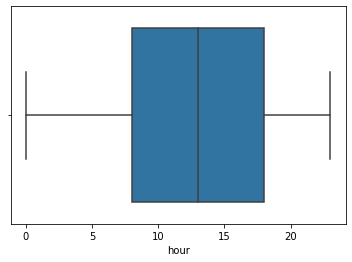

In [280]:
sns.boxplot(df["hour"])

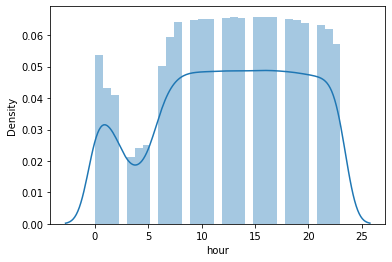

In [281]:
sns.distplot(df["hour"])

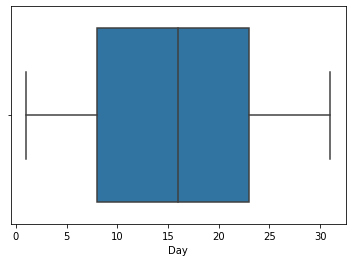

In [282]:
sns.boxplot(df["Day"])

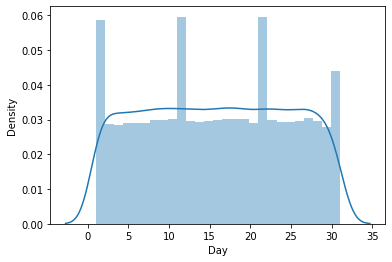

In [283]:
sns.distplot(df["Day"])

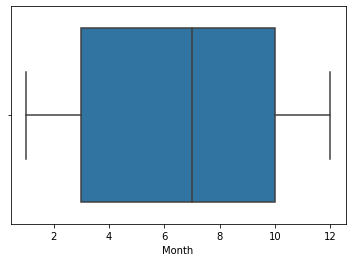

In [284]:
sns.boxplot(df["Month"])

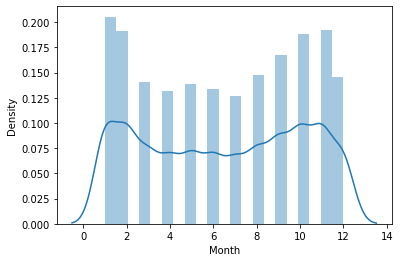

In [285]:
sns.distplot(df["Month"])

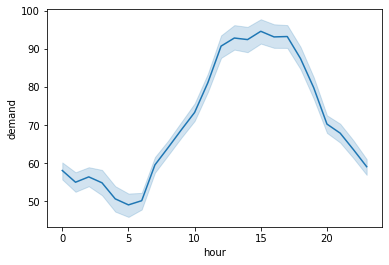

In [286]:
sns.lineplot(df["hour"], df["demand"])


In [287]:
df

,date,hour,demand,DATE,Year,Month,Day,Day_of_week,Week_Number,Daytime,Weekend,0,1,2,3,4,5
0,2018-08-18,9,91,2018-08-18,2018,8,18,Saturday,33,0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2018-08-18,10,21,2018-08-18,2018,8,18,Saturday,33,0,1,0.0,1.0,0.0,0.0,0.0,0.0
2,2018-08-18,13,23,2018-08-18,2018,8,18,Saturday,33,1,1,0.0,1.0,0.0,0.0,0.0,0.0
3,2018-08-18,14,104,2018-08-18,2018,8,18,Saturday,33,1,1,0.0,1.0,0.0,0.0,0.0,0.0
4,2018-08-18,15,81,2018-08-18,2018,8,18,Saturday,33,1,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,2021-02-28,2021,2,28,Sunday,8,0,1,0.0,0.0,1.0,0.0,0.0,0.0
18243,2021-02-28,20,88,2021-02-28,2021,2,28,Sunday,8,0,1,0.0,0.0,1.0,0.0,0.0,0.0
18244,2021-02-28,21,39,2021-02-28,2021,2,28,Sunday,8,0,1,0.0,0.0,1.0,0.0,0.0,0.0
18245,2021-02-28,22,104,2021-02-28,2021,2,28,Sunday,8,0,1,0.0,0.0,1.0,0.0,0.0,0.0


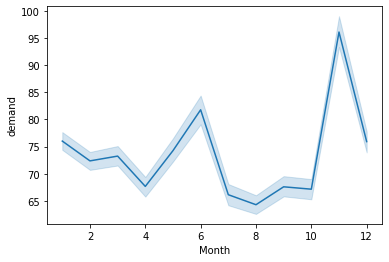

In [288]:
sns.lineplot(df["Month"], df["demand"])

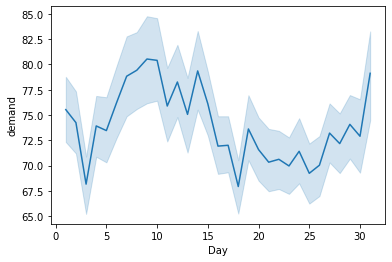

In [289]:
sns.lineplot(df["Day"], df["demand"])

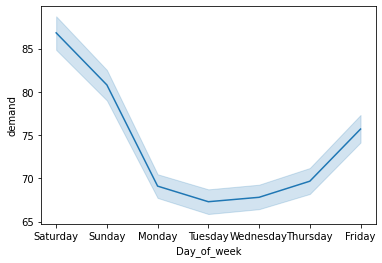

In [290]:
sns.lineplot(df["Day_of_week"], df["demand"])

In [291]:
df.drop(columns=['DATE','date'],axis=1,inplace=True)

In [292]:
X=df.drop(columns=["demand","Day_of_week"],axis=1)

In [293]:
y=df["demand"]

In [294]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [295]:
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
gbr=GradientBoostingRegressor()
lr=LinearRegression()
rfg = RandomForestRegressor(n_estimators = 500, random_state = 42)
abr = AdaBoostRegressor()
reg = XGBRegressor(n_estimators=1400, learning_rate=0.1,verbosity = 0, silent=True)
lsv=LinearSVR()

In [296]:
clfs = {
    'Decision Tree' : dtr,
    'KNearest' : knr, 
    'GradientBoost': gbr, 
    'LinerReg': lr, 
    'RandomForest': rfg, 
    'AdaBoost': abr, 
    'XGBoost': reg, 
    'LinearSVR': lsv, 
}

In [297]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    mse = math.sqrt(mean_squared_error(y_test, y_pred))
    
    return mse

In [298]:
rmse_s = []

for name,clf in clfs.items():
    
    current_rmse= train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("RMSE - ",current_rmse)
    
    rmse_s.append(current_rmse)

For  Decision Tree
RMSE -  45.49512110659216
For  KNearest
RMSE -  35.482436236846716
For  GradientBoost
RMSE -  34.39267348057679
For  LinerReg
RMSE -  38.66930481719261
For  RandomForest
RMSE -  33.7230269929946
For  AdaBoost
RMSE -  36.9195213602185
For  XGBoost
RMSE -  33.20436114648993
For  LinearSVR
RMSE -  48.283600384131525


In [ ]:

n_estimators = [200,350,500,700]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 350, 500, 700]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 500}

In [299]:
rfg = RandomForestRegressor(bootstrap= True,
 max_features='sqrt',
 min_samples_split= 5,
 n_estimators= 500, random_state = 42)

In [300]:

rfg.fit(X_train,y_train)
y_pred = rfg.predict(X_test)
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print(mse)

33.06615992394551


In [ ]:
param_grid ={"learning_rate"    : [0.05, 0.10, 0.20 ] ,
 "max_depth"        : [6, 10],
 "min_child_weight" : [ 1, 3, 5],
 "gamma"            : [ 0.0, 0.2 ]}

grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[12:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(n_estimators=1400), n_jobs=-1,
             param_grid={'gamma': [0.0, 0.2], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [6, 10], 'min_child_weight': [1, 3, 5]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5}

In [301]:
reg = XGBRegressor(n_estimators=250, gamma= 0.0, learning_rate= 0.05, max_depth= 6, min_child_weight= 5, verbosity = 0, silent=True)

In [302]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print(mse)

32.46301433886449


In [38]:
gbr=GradientBoostingRegressor()
param_grid = {
    "n_estimators":[500,700,1000],
    "max_depth":[7,9,15],
    "learning_rate":[0.01,0.1,1,10,100]
}
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [7, 9, 15],
                         'n_estimators': [500, 700, 1000]},
             verbose=2)

In [39]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

In [303]:
gbr = GradientBoostingRegressor(learning_rate= 0.01, max_depth=7, n_estimators=500)

In [304]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print(mse)

32.5737016756844


In [305]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('GradientBoost', gbr), ('RandomForest', rfg), ('XGBoost', reg)])
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)

Root mean square error 32.39185496568847


In [306]:
from sklearn.ensemble import StackingRegressor
estimators=[('GradientBoost', gbr), ('RandomForest', rfg), ('XGBoost', reg)]
final_estimator=XGBRegressor(verbosity = 0, silent=True)
stacking = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
stacking.fit(X_train,y_train)
y_pred = stacking.predict(X_test)
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)

Root mean square error 32.33453944893196


In [307]:
df = pd.read_csv('test.csv',encoding='latin-1')

In [308]:
convert()
encode()

In [309]:
df.drop(columns=['DATE','date'],axis=1,inplace=True)

In [310]:
df.head()

,hour,Year,Month,Day,Day_of_week,Week_Number,Daytime,Weekend,0,1,2,3,4,5
0,0,2021,1,3,Sunday,53,0,1,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2021,1,3,Sunday,53,0,1,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2021,1,3,Sunday,53,0,1,0.0,0.0,1.0,0.0,0.0,0.0
3,3,2021,1,3,Sunday,53,0,1,0.0,0.0,1.0,0.0,0.0,0.0
4,5,2021,1,3,Sunday,53,0,1,0.0,0.0,1.0,0.0,0.0,0.0


In [311]:
X=df.drop(columns=["Day_of_week"],axis=1)

pred =voting.predict(X)

df["demand"]=pred


In [312]:
df["demand"]=df['demand'].round(decimals = 0)

In [313]:
df.to_csv('voting.csv')

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         7650 non-null   int64  
 1   Year         7650 non-null   int64  
 2   Month        7650 non-null   int64  
 3   Day          7650 non-null   int64  
 4   Day_of_week  7650 non-null   object 
 5   Week_Number  7650 non-null   int64  
 6   Daytime      7650 non-null   int64  
 7   Weekend      7650 non-null   int64  
 8   0            7650 non-null   float64
 9   1            7650 non-null   float64
 10  2            7650 non-null   float64
 11  3            7650 non-null   float64
 12  4            7650 non-null   float64
 13  5            7650 non-null   float64
 14  demand       7650 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 896.6+ KB
